# Heart Disease Prediction

In this machine learning project, We have collected the dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and We will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not.

### Import libraries

First importing all the necessary libraries. We used `numpy` and `pandas` to start with. For visualization, We will use `pyplot` subpackage of `matplotlib`, use `rcParams` to add styling to the plots and `rainbow` for colors. For implementing Machine Learning models and processing of data, We have used `sklearn` library.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

For processing the data, We have imported a few libraries. To split the available dataset for testing and training, We use the `train_test_split` method. To scale the features, We are using `StandardScaler`.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Next, We have imported all the Machine Learning algorithms we will be using.
1. K Neighbors Classifier
2. Support Vector Classifier
3. Decision Tree Classifier
4. Random Forest Classifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Import dataset

Now that we have all the libraries we will need, We can import the dataset and take a look at it. The dataset is stored in the file `dataset.csv`. We will use the pandas `read_csv` method to read the dataset.

In [8]:
dataset = pd.read_csv('dataset.csv')

The dataset is now loaded into the variable `dataset`. We will just take a glimpse of the data using the `desribe()` and `info()` methods before we actually start processing and visualizing it.

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Looks like the dataset has a total of 303 rows and there are no missing values. There are a total of `13 features` along with one target value which we wish to find.

In [10]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The scale of each feature column is different and quite varied as well. While the maximum for `age` reaches 77, the maximum of `chol` (serum cholestoral) is 564.

### Understanding the data

Now, we can use visualizations to better understand our data and then look at any processing we might want to do.

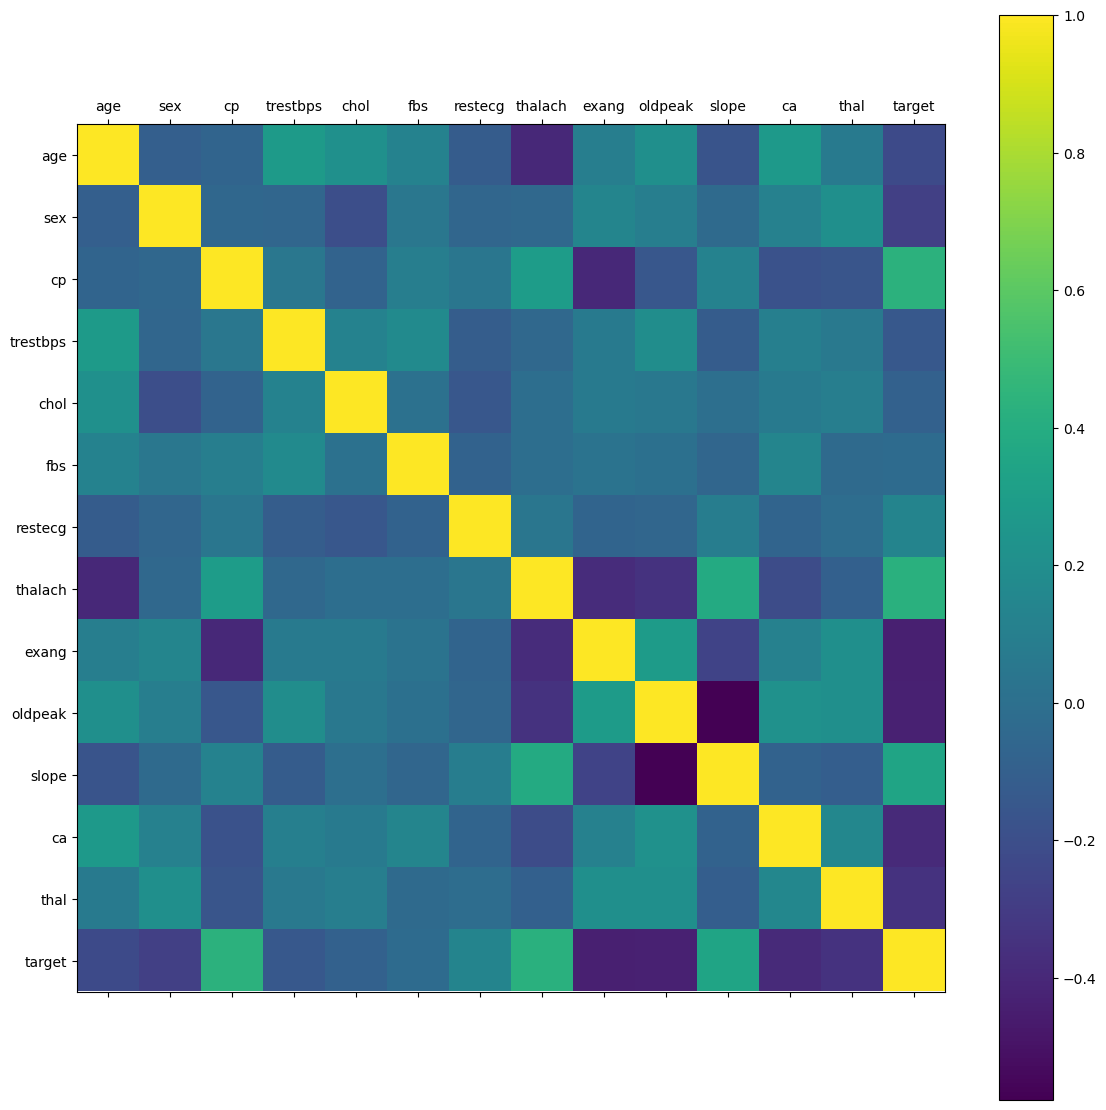

In [11]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

Taking a look at the correlation matrix above, it's easy to see that a few features have negative correlation with the target value while some have positive.
Next, We'll take a look at the histograms for each variable.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

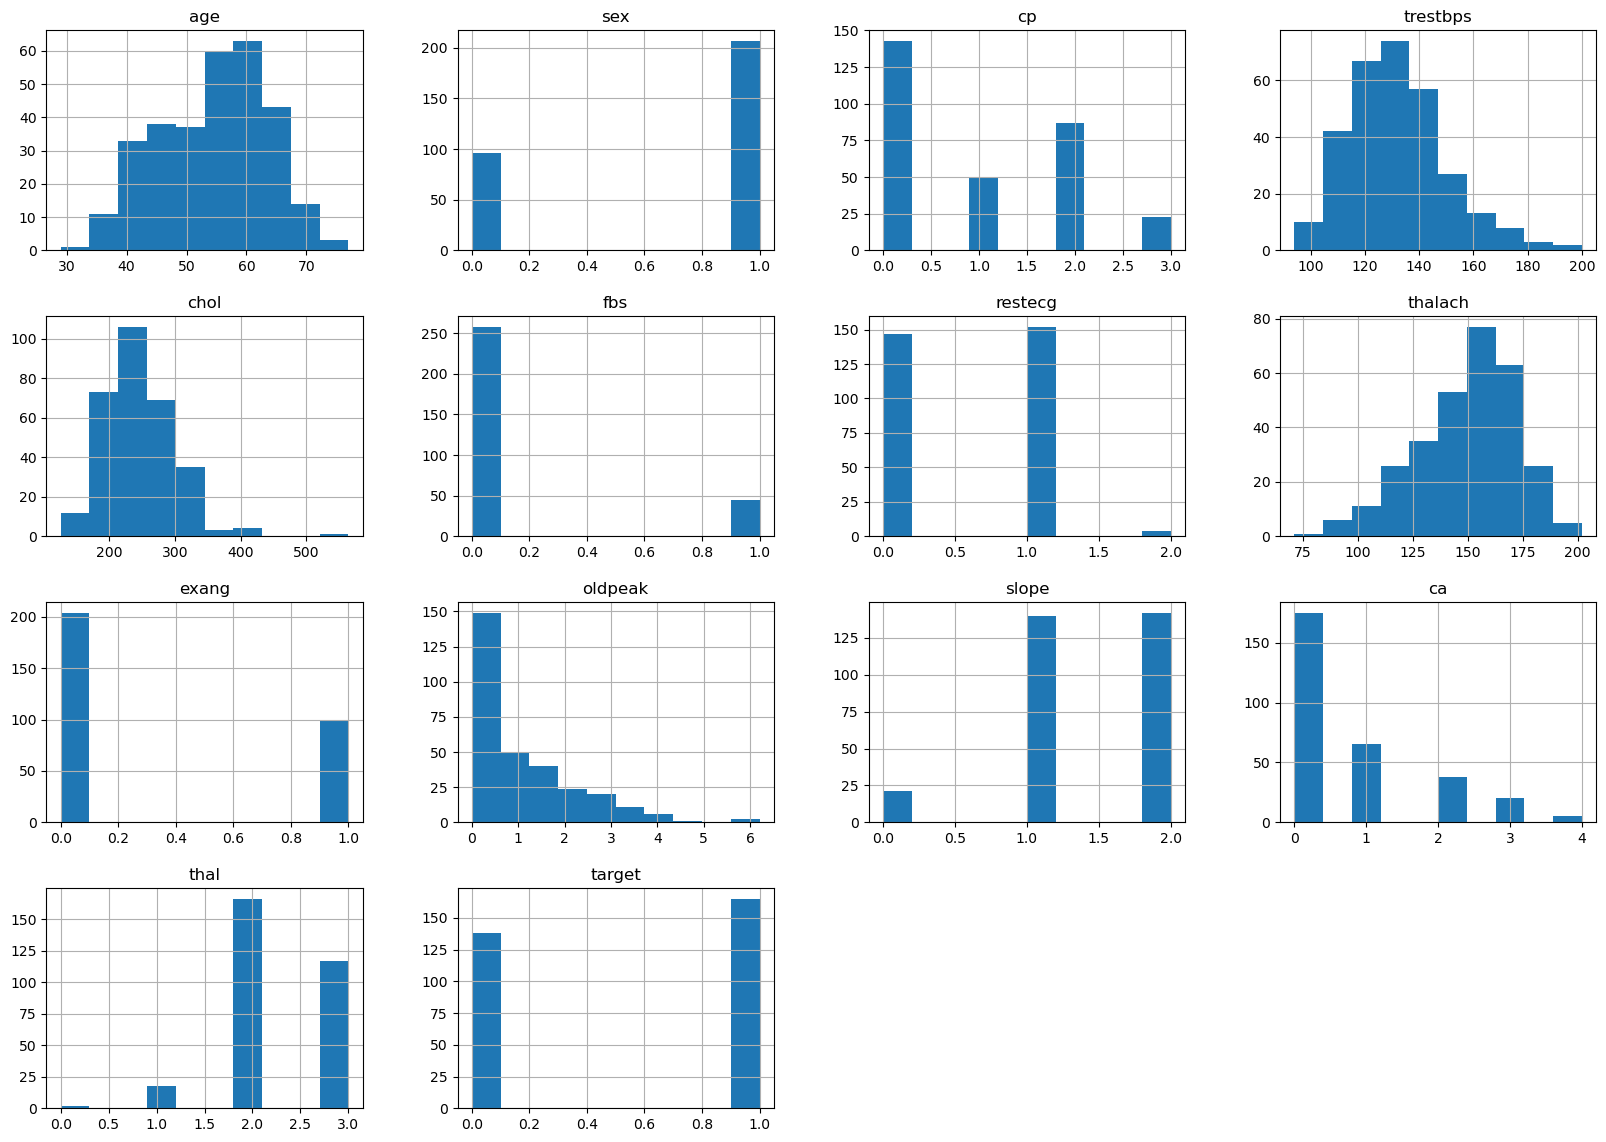

In [12]:
dataset.hist()

Taking a look at the histograms above, We can see that each feature has a different range of distribution. Thus, using scaling before our predictions should be of great use. Also, the categorical features do stand out.

It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, checking for the same.

Text(0.5, 1.0, 'Count of each Target Class')

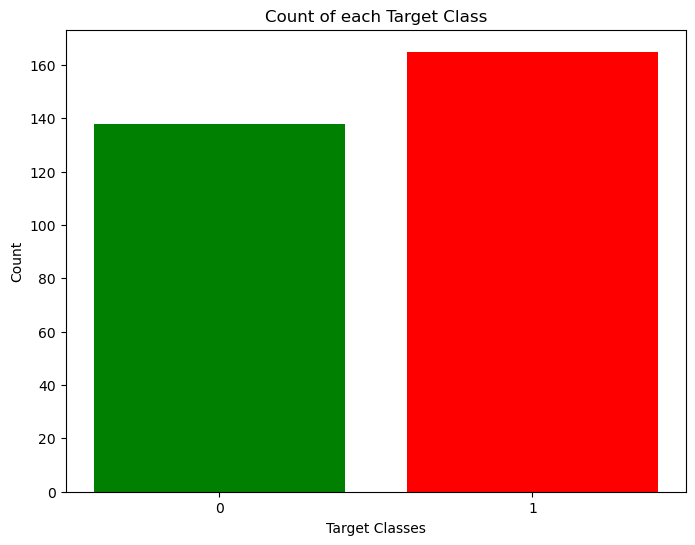

In [13]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

The two classes are not exactly 50% each but the ratio is good enough to continue without dropping/increasing our data.

### Data Processing

After exploring the dataset, We observed that we need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, We use the `get_dummies` method to create dummy columns for categorical variables.

In [14]:
#dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

Now, We will use the `StandardScaler` from `sklearn` to scale my dataset.

In [15]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

The data is not ready for our Machine Learning application.

### Machine Learning

We'll now import `train_test_split` to split our dataset into training and testing datasets. Then, We'll import all Machine Learning models we'll be using to train and test the data.

In [16]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
X_train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
252,0.841908,0,0,0.364165,0.922521,1,1,-1.908699,0,0.742260,1,3,2
54,0.952197,0,2,0.192827,0.110850,0,0,0.977514,0,-0.896862,2,0,2
234,1.724218,1,0,-0.092738,1.463634,0,0,-1.777508,0,1.173608,1,3,2
18,-1.253580,1,0,1.049520,0.014223,0,1,0.933783,0,0.397182,2,0,2
205,-0.260980,1,0,-0.206964,0.168827,0,1,0.496478,1,-0.896862,2,1,3


#### K Neighbors Classifier

The classification score varies based on different values of neighbors that we choose. Thus, We'll plot a score graph for different values of K (neighbors) and check when do we achieve the best score.

In [17]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

We have the scores for different neighbor values in the array `knn_scores`. We'll now plot it and see for which value of K did we get the best scores.

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

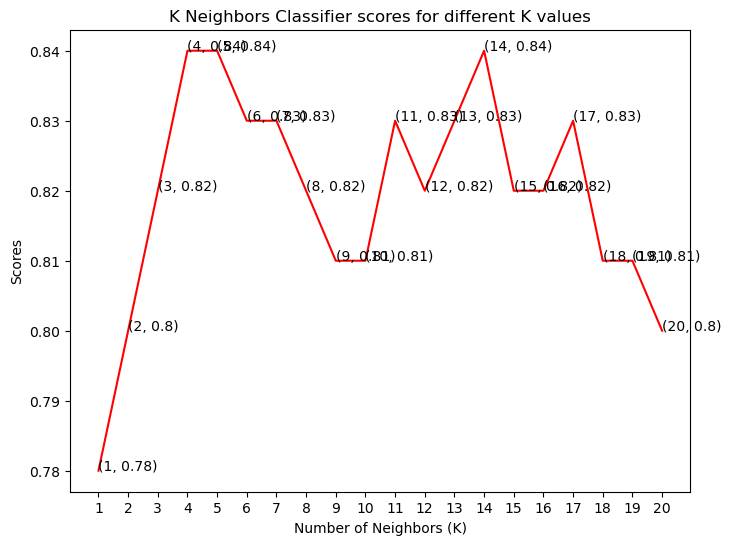

In [18]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

From the plot above, it is clear that the maximum score achieved was `0.84` for the 14 neighbors.

In [19]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[7]*100, 8))

The score for K Neighbors Classifier is 82.0% with 8 nieghbors.


#### Support Vector Classifier

There are several kernels for Support Vector Classifier. We'll test some of them and check which has the best score.

In [20]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

We'll now plot a bar plot of scores for each kernel and see which performed the best.

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

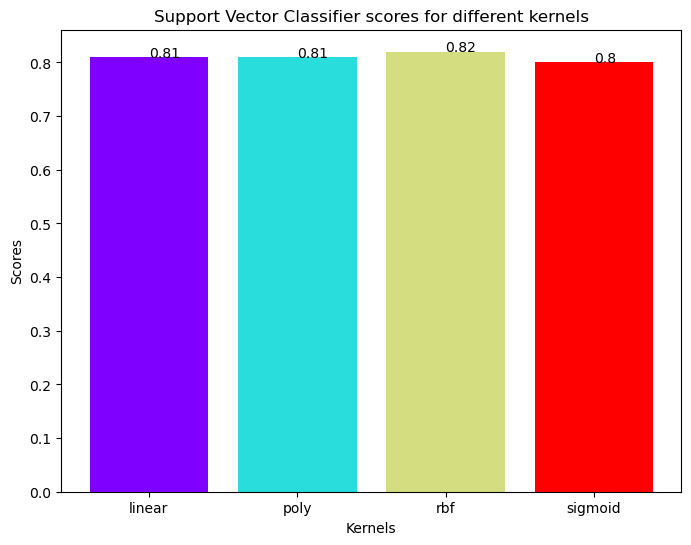

In [21]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

The `rbf` kernel performed the best, being slightly better than `linear` kernel.

In [22]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[2]*100, 'linear'))

The score for Support Vector Classifier is 82.0% with linear kernel.


#### Decision Tree Classifier

Here, we'll use the Decision Tree Classifier to model the problem at hand. We'll vary between a set of `max_features` and see which returns the best accuracy.

In [23]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

We have selected the maximum number of features from 1 to 13 for split. Now, let's see the scores for each of those cases.

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

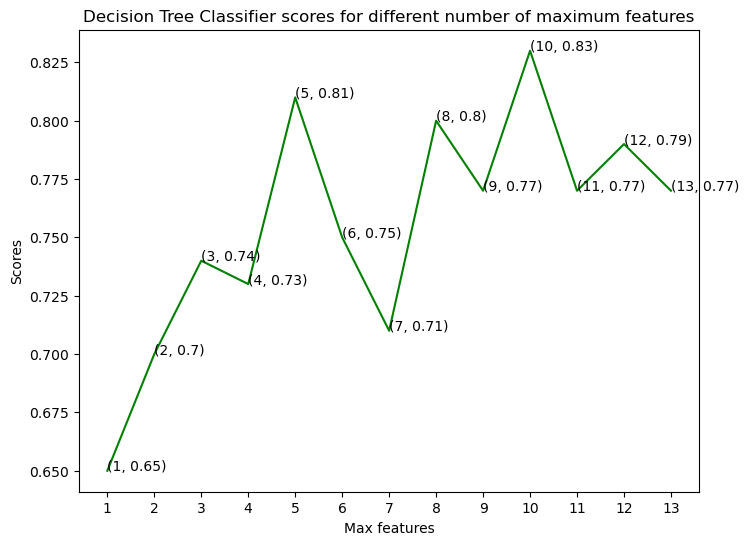

In [24]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

The model achieved the best accuracy at three values of maximum features, `2`, `4` and `18`.

In [25]:
print(dt_scores)
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[12]*100, [2,4,18]))

[0.65, 0.7, 0.74, 0.73, 0.81, 0.75, 0.71, 0.8, 0.77, 0.83, 0.77, 0.79, 0.77]
The score for Decision Tree Classifier is 77.0% with [2, 4, 18] maximum features.


#### Random Forest Classifier

Now, We'll use the ensemble method, Random Forest Classifier, to create the model and vary the number of estimators to see their effect.

In [26]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

The model is trained and the scores are recorded. Let's plot a bar plot to compare the scores.

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

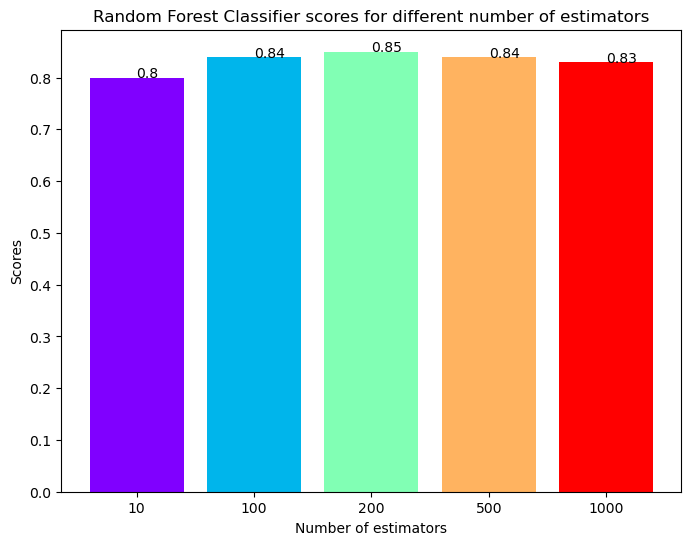

In [27]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

The maximum score is achieved when the total estimators are 100 or 500.

In [28]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[2]*100, [100, 500]))

The score for Random Forest Classifier is 85.0% with [100, 500] estimators.


### Conclusion

In this project, We used Machine Learning to predict whether a person is suffering from a heart disease. After importing the data, We analysed it using plots. 
We then applied four Machine Learning algorithms, `K Neighbors Classifier`, `Support Vector Classifier`, `Decision Tree Classifier` and `Random Forest Classifier`. We varied parameters across each model to improve their scores.
In the end, `Random Forest Classifier` achieved the highest score of `85%`.

### GUI

Here we have created GUI for our project with the usage of Tkinter standard python GUI library. So we can perform predictions using this GUI.

In [29]:
from tkinter import *
import joblib
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = knn_classifier
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()